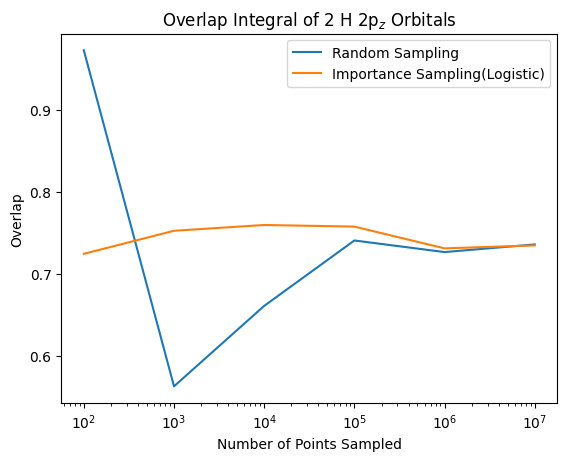

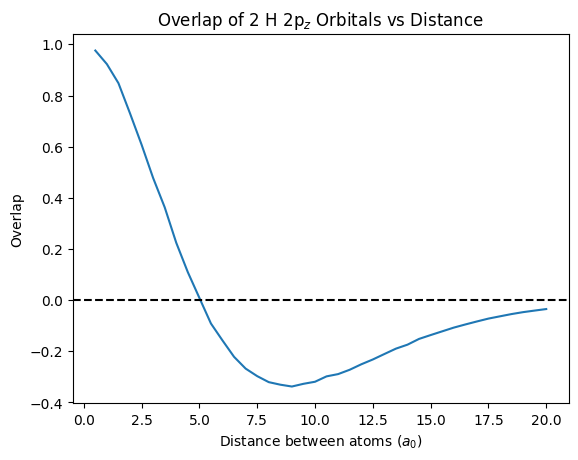

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R = 2 # Atomic units or a.u.
a_0 = 1 # a.u.
np.random.seed(22) # For reproducibility

def psi_2p_z(x,y,z):
    psi = (z/(4*np.sqrt(2*np.pi)*a_0**2.5)*np.exp(-np.sqrt(x**2+y**2+z**2)/(2*a_0)))
    return psi

def overlap_random(R,L,N):
    x = np.random.uniform(-L,L,N)
    y = np.random.uniform(-L,L,N) # Uniform distributions between -L and L
    z = np.random.uniform(-L,L,N)
    integrand = psi_2p_z(x,y,z+R/2)*psi_2p_z(x,y,z-R/2)
    S = np.mean(integrand) * (2*L)**3 # Average times volume
    return S

ave = []
N_s = np.array([100,1000,10000,100000,1000000,10000000]) # 10^2 to 10^7. 10^8 lags my computer hard.
for N in N_s:
    ave = np.append(ave, overlap_random(R,20,N))

plt.plot(N_s, ave, label = "Random Sampling")


from scipy.stats import logistic # The Logistic function has decent overlap with 2pz in z, and great overlap in x and y

def overlap_logistic(R,N):
    x = logistic.rvs(size=N,scale=1)
    y = logistic.rvs(size=N,scale=1)
    z = logistic.rvs(size=N,scale=1)
    integrand = psi_2p_z(x,y,z+R/2)*psi_2p_z(x,y,z-R/2)/(logistic.pdf(x)*logistic.pdf(y)*logistic.pdf(z))
    S = np.mean(integrand) # Since the logistic function integrates to 1, no volume element is needed.
    return S

ave2 = []
for N in N_s:
    ave2 = np.append(ave2,overlap_logistic(R,N))

plt.plot(N_s, ave2, label = "Importance Sampling(Logistic)")
plt.xscale("log")
plt.xlabel("Number of Points Sampled")
plt.ylabel("Overlap")
plt.title("Overlap Integral of 2 H 2p$_z$ Orbitals")
plt.legend()
plt.show()

distances = np.linspace(.5*a_0,20*a_0,40) # Given that a_0 is 1, its inclusion is probably not necessary
over = []
for d in distances:
    over = np.append(over,overlap_logistic(d,10**6))

plt.plot(distances,over)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Distance between atoms ($a_0$)")
plt.ylabel("Overlap")
plt.title("Overlap of 2 H 2p$_z$ Orbitals vs Distance")
plt.show()

The importance sampling graph converges to a single value faster than the random sampling graph. This suggests that it is more efficient and can get a more accurate answer with less points sampled. Since it is more likely to sample points in areas where the overlap function has a high amplitude, its samples are, on average, more valuable, especially since there is little overlap past 10 a.u. of the center of the system in any direction, an area that the random sampler would choose around 7/8ths of the time.

The 2p_z hydrogen orbitals are oriented the same direction. Thus, when their lobes closest to each other interact, they interfere destructively, similar to a sigma antibonding molecular orbital. However, when the two atoms' nuclei are effectively overlapping (ie at lower distances), their orbitals are in phase with each other and interfere constructively, giving a positive overlap integral. If the atoms were offset in the x or y directions from each other, this overlap would be similar to a pi bonding orbital. 
The graph also shows the dependence on R that the overlap integral has, as the integral flattens to 0 as R increases, suggesting that overlap is negligible at high values of R, and that the hydrogens must be close together for their orbitals to overlap in a substantial way.